# Coding Exercises (Part 16)

## Financial Portfolios

### Exercise 16 : Modern Portfolio Theory and Asset Pricing 

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the datasets __us_stocks.csv__ and __SP500_TR.csv__ and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrames in the variables __stocks__ and __SP500__ and finally __add the S&P 500__ to the stocks DataFrame as the best approximation for the Market Portfolio (column __"MP"__)!

__Calculate__ (simple) __daily returns__ for the six stocks and the Market Portfolio and calculate the __annualized Risk and Return__! (Use the user-defined function ann_risk_return)

In [ ]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Assume that the approx. __risk-free Return__ is __1.7%__ p.a.

__Calculate__ the following __Metrics__ for the six stocks and the Market Portfolio: 

- Sharpe Ratio
- Total Risk in Variance Units
- the annualized Covariance Matrix
- Systematic Risk
- Unsystematic Risk
- beta
- Required Return as per CAPM Model (capm_ret)
- alpha

Visualize __Systematic Risk__ and __Unsystematic Risk__ for all stocks and the MP in a __Barchart__. Which __Company__ most likely showed the __highest portion__ of __Company-specific Risk__ that can be diversified away in the Market Portfolio?

__Visualize__ the __Security Market Line__. __Determine__ the stocks that __overperformed__ and __underperformed__ the __Market__ in the Systematic Risk/Return Framework (CAPM).

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

164. __Import__ the files __us_stocks.csv__ and __SP500_TR.csv__ and select the __appropriate Price Data__ to calculate __Total Returns__! (Close vs. Adj Close) <br> __Assign__ the variables __stocks__ and __SP500__! __Fill in the gaps!__

In [3]:
stocks = pd.read_csv("us_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500 =  pd.read_csv("SP500_TR.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

165. __Select__ the 5-Year Period from __2014__ (incl.) until __2018__ (incl.) and __overwrite stocks__ and __SP500__! (Hint: Start with "2013-12-31")

In [4]:
#run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2009-12-31,35.27,nan,15.25,47.06,45.15,42.55
2010-01-04,35.62,nan,15.61,47.31,45.51,43.17
2010-01-05,35.54,nan,15.60,46.95,45.53,42.74
2010-01-06,36.12,nan,15.55,46.31,45.31,42.64
2010-01-07,36.70,nan,15.40,46.65,45.06,42.67


In [5]:
#run the cell!
stocks.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,90.96,124.95,44.56,174.15,90.26,87.13
2018-12-24,89.14,124.06,43.32,170.28,86.67,85.82
2018-12-26,93.46,134.18,45.90,174.03,89.38,90.41
2018-12-27,94.29,134.52,46.07,175.71,91.30,91.59
2018-12-28,94.04,133.20,46.46,175.56,90.46,92.13


In [6]:
#run the cell!
SP500.head()

,Adj Close
Date,
1988-12-30,288.12
1989-01-03,285.65
1989-01-04,289.99
1989-01-05,290.61
1989-01-06,291.29


In [7]:
#run the cell!
SP500.tail()

,Adj Close
Date,
2018-12-21,4802.51
2018-12-24,4672.66
2018-12-26,4904.49
2018-12-27,4946.94
2018-12-28,4941.61


166. __Add__ the __S&P 500__ to the __stocks__ DataFrame and create a __new column "MP"__ (Market Portfolio)! __Fill in the gaps__!

In [8]:
stocks["MP"] = SP500["Adj Close"]

In [9]:
#run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT,MP
Date,,,,,,,
2009-12-31,35.27,nan,15.25,47.06,45.15,42.55,1837.50
2010-01-04,35.62,nan,15.61,47.31,45.51,43.17,1867.06
2010-01-05,35.54,nan,15.60,46.95,45.53,42.74,1872.90
2010-01-06,36.12,nan,15.55,46.31,45.31,42.64,1874.73
2010-01-07,36.70,nan,15.40,46.65,45.06,42.67,1882.34


167. __Create__ and __save__ the (daily, simple) __returns__ DataFrame in the variable __ret__!

In [10]:
ret = stocks.pct_change().dropna()

168. Create the user-defined function __ann_risk_return__ and calculate __annualized risk and return__ for the six constituents and the Market Portfolio! __Save__ the resulting DataFrame in the variable __summary__

In [11]:
#run the cell!
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [12]:
summary = ann_risk_return(ret)

In [13]:
#run the cell!
summary

,Return,Risk
AXP,0.12,0.20
FB,0.26,0.37
INTC,0.15,0.24
MCD,0.15,0.16
PG,0.10,0.15
WMT,0.10,0.18
MP,0.13,0.13


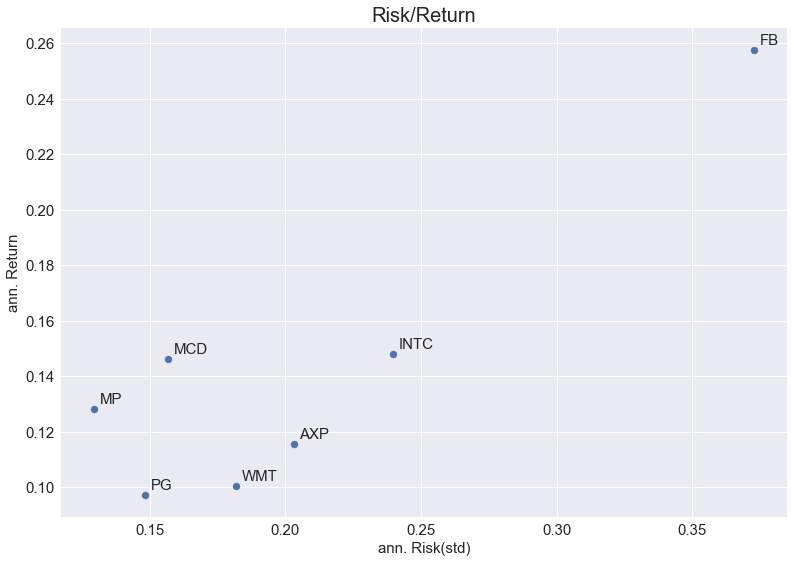

In [14]:
#run the cell!
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

The __risk-free return__ of the risk-free asset is __1.7%__ p.a.

In [15]:
# run the cell!
risk_free_return = 0.017
risk_free_risk = 0

In [16]:
# run the cell!
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

169. __Calculate__ the __Sharpe Ratio__ for all seven assets in summary and __add__ the __column "Sharpe"__ to summary!

In [17]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [18]:
# run the cell!
summary

,Return,Risk,Sharpe
AXP,0.12,0.20,0.49
FB,0.26,0.37,0.65
INTC,0.15,0.24,0.55
MCD,0.15,0.16,0.82
PG,0.10,0.15,0.54
WMT,0.10,0.18,0.46
MP,0.13,0.13,0.86


170. __Convert__ the __risk__ to variance units and __add__ the new __column "TotalRisk_var"__. __Fill in the gaps__!

In [19]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [20]:
# run the cell!
summary

,Return,Risk,Sharpe,TotalRisk_var
AXP,0.12,0.20,0.49,0.04
FB,0.26,0.37,0.65,0.14
INTC,0.15,0.24,0.55,0.06
MCD,0.15,0.16,0.82,0.02
PG,0.10,0.15,0.54,0.02
WMT,0.10,0.18,0.46,0.03
MP,0.13,0.13,0.86,0.02


171. __Create__ the annualized __Covariance Matrix__ and assign the variable __COV__! __Fill in the gaps__!

In [21]:
COV = ret.cov()*252

In [22]:
# run the cell!
COV

,AXP,FB,INTC,MCD,PG,WMT,MP
AXP,0.04,0.02,0.02,0.01,0.01,0.01,0.02
FB,0.02,0.14,0.02,0.01,0.01,0.01,0.02
INTC,0.02,0.02,0.06,0.01,0.01,0.01,0.02
MCD,0.01,0.01,0.01,0.02,0.01,0.01,0.01
PG,0.01,0.01,0.01,0.01,0.02,0.01,0.01
WMT,0.01,0.01,0.01,0.01,0.01,0.03,0.01
MP,0.02,0.02,0.02,0.01,0.01,0.01,0.02


172. __Add__ the column __"SystRisk_var"__ to the DataFrame summary, that shows the __Systematic Risk (Market Risk__) in relation to the Market Portfolio (__MP__). <br>
__Fill in the gaps__!

In [23]:
summary["SystRisk_var"] = COV.iloc[:, -1]

173. __Add__ the column __"UnsystRisk_var"__ with the __Unsystematic Risk (Company-specific Risk__!)    

In [24]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [25]:
# run the cell!
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AXP,0.12,0.20,0.49,0.04,0.02,0.02
FB,0.26,0.37,0.65,0.14,0.02,0.12
INTC,0.15,0.24,0.55,0.06,0.02,0.04
MCD,0.15,0.16,0.82,0.02,0.01,0.01
PG,0.10,0.15,0.54,0.02,0.01,0.01
WMT,0.10,0.18,0.46,0.03,0.01,0.02
MP,0.13,0.13,0.86,0.02,0.02,-0.00


174. Visualize __System. Risk & Unsystem. Risk__ of each Stock and the MP with a __barplot__! __Fill in the gaps__! <br>
Which __Company__ most likely showed the __highest portion__ of __Company-specific Risk__ that can be diversified away in the Market Portfolio?

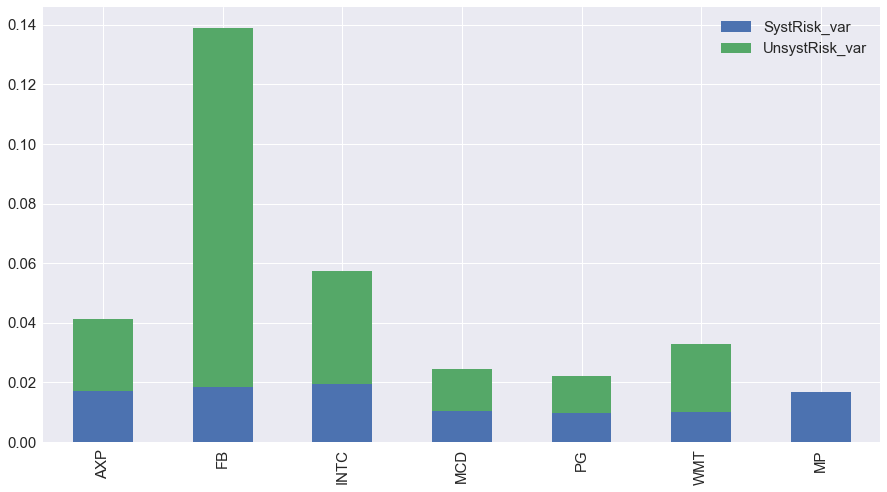

In [26]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

The company-specific risk is extremely high for ... the Facebook stock.

175. __Normalize__ the __Systematic Risk__ and create a __new column "beta"__ with the Beta-Factor! __Fill in the gaps__! <br> Which __Company__ has the highest __Beta-Factor__?

In [27]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [28]:
# run the cell!
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AXP,0.12,0.20,0.49,0.04,0.02,0.02,1.01
FB,0.26,0.37,0.65,0.14,0.02,0.12,1.11
INTC,0.15,0.24,0.55,0.06,0.02,0.04,1.16
MCD,0.15,0.16,0.82,0.02,0.01,0.01,0.61
PG,0.10,0.15,0.54,0.02,0.01,0.01,0.58
WMT,0.10,0.18,0.46,0.03,0.01,0.02,0.60
MP,0.13,0.13,0.86,0.02,0.02,-0.00,1.00


Facebook has the highest Beta-Factor and has therefore the highest exposure to market-specific Risk.

176. Create the __Security Market Line__! __Fill in the gaps__! <br>
__Determine__ the stocks that __overperformed__ and __underperformed__ the __Market__ in the Systematic Risk/Return Framework (CAPM).

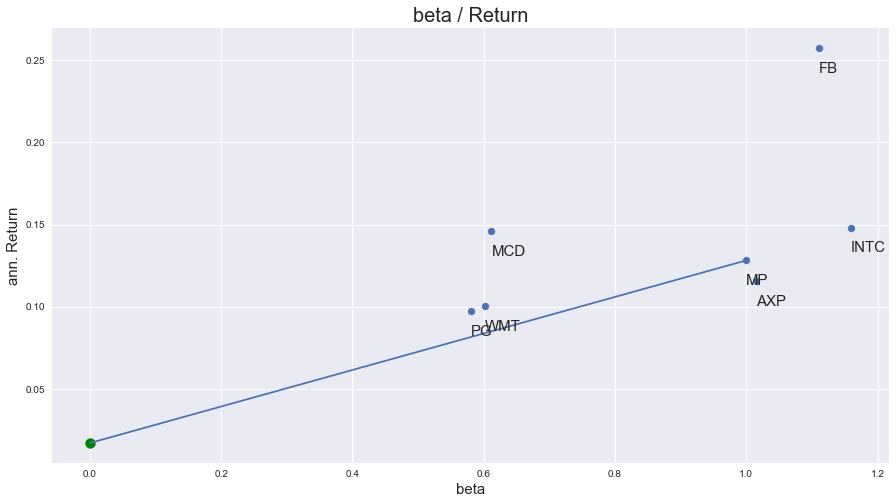

In [29]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

There is only one stock that underperformed the Market ... American Express (having tough times with Fintechs?)

177. __Add__ the new __column "capm_ret"__ with the __required Return__ according to the __CAPM__ Model! __Fill in the gaps__!

In [30]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

178. Finally, __add__ the new __column "alpha"__ showing the over-/underperformance (Excess Return)! <br>
Which __Company__ shows the __highest__ / __lowest__ alpha?

In [32]:
summary["alpha"] = summary.Return - summary.capm_ret

In [33]:
# run the cell!
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AXP,0.12,0.20,0.49,0.04,0.02,0.02,1.01,0.13,-0.01
FB,0.26,0.37,0.65,0.14,0.02,0.12,1.11,0.14,0.12
INTC,0.15,0.24,0.55,0.06,0.02,0.04,1.16,0.15,0.00
MCD,0.15,0.16,0.82,0.02,0.01,0.01,0.61,0.09,0.06
PG,0.10,0.15,0.54,0.02,0.01,0.01,0.58,0.08,0.02
WMT,0.10,0.18,0.46,0.03,0.01,0.02,0.60,0.08,0.02
MP,0.13,0.13,0.86,0.02,0.02,-0.00,1.00,0.13,0.00


Highest alpha: Facebook; lowest alpha: American Express

# Well Done!

-------------------

# Hints (Spoiler!)

164. Select the Adj Close Prices

165. df = df.loc[--- : ---]

166. new column with label "MP"

167. pct_change() and dropna() method

168. summary = ann_risk_return(--)

169. Sharpe Ratio = (Asset Return - Risk Free Return) / Asset Risk

170. numpy method power(), to the power of 2

171. cov() method

172. the very last column in COV shows the covariance of the stocks with the MP (=Systematic Risk)

173. Unsystematic Risk = Total Risk - Systematic Risk

174. plot() method, "bar" plot

175. beta = systematic risk / variance of the Market Portfolio

176. beta on the x-axis, Return on the y-axis

177. capm_return = risk-free Return + (Market Portfolio Return - risk-free Return) * beta 

178. alpha = actual/realized Return - capm_return